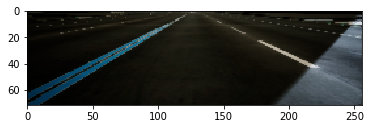

In [17]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt 
from importlib import reload
from collection import utils; reload(utils)
from collection.utils import *
import math

img = cv2.imread('Input/inputDetectLine2.png', cv2.IMREAD_COLOR)
a = math.floor(img.shape[0]/2)
img = img[a:, :img.shape[1]]
plt.imshow(img)
plt.show()

In [18]:
def to_hsv(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
def to_hsl(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

In [ ]:
hsv_image = to_hsv(img)
hsl_image = to_hsl(img)
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(hsv_image)
ax[0].axis("off")
ax[0].set_title("HSV Image")

ax[1].imshow(hsl_image)
ax[1].axis("off")
ax[1].set_title("HSL Image")

plt.show()

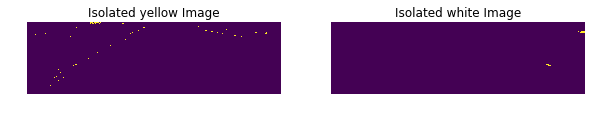

In [19]:

# Image should have already been converted to HSL color space
def isolate_yellow_hsl(img):
    # Caution - OpenCV encodes the data in ****HLS*** format
    # Lower value equivalent pure HSL is (30, 45, 15)
#    Higher value equivalent pure HSL is (75, 100, 80)
    low_threshold = np.array([30, 45, 15], dtype=np.uint8)
    high_threshold = np.array([75, 100, 80], dtype=np.uint8)  
    
#    low_threshold = np.array([10, 0, 90], dtype=np.uint8)
#    high_threshold = np.array([50, 255, 255], dtype=np.uint8)  
    yellow_mask = cv2.inRange(img, low_threshold, high_threshold)
    
    return yellow_mask
                            

# Image should have already been converted to HSL color space
def isolate_white_hsl(img):
    # Caution - OpenCV encodes the data in ***HLS*** format
    # Lower value equivalent pure HSL is (30, 45, 15)
    low_threshold = np.array([0, 200, 0], dtype=np.uint8)
    high_threshold = np.array([180, 255, 255], dtype=np.uint8)  
#    low_threshold = np.array([0, 190, 0], dtype=np.uint8)
#    high_threshold = np.array([255, 255, 255], dtype=np.uint8)  

# Higher value equivalent pure HSL is (360, 100, 100)

    
    yellow_mask = cv2.inRange(img, low_threshold, high_threshold)
    
    return yellow_mask

hsl_yellow_image = isolate_yellow_hsl(hsl_image)
hsl_white_image = isolate_white_hsl(hsl_image)
#hsl_yellow_image = isolate_yellow_hsl(hsv_image)
#hsl_white_image = isolate_white_hsl(hsv_image)
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(hsl_yellow_image)
ax[0].axis("off")
ax[0].set_title("Isolated yellow Image")

ax[1].imshow(hsl_white_image)
ax[1].axis("off")
ax[1].set_title("Isolated white Image")

plt.show()

In [ ]:
def combine_hsl_isolated_with_original(img, hsl_yellow, hsl_white):
    hsl_mask = cv2.bitwise_or(hsl_yellow, hsl_white)
    #return cv2.bitwise_and(img, hsl_mask)
    return cv2.bitwise_and(img, img, mask=hsl_mask)

def filter_img_hsl(img):
    hsl_img = to_hsl(img)
    #hsl_img = to_hsv(img)
    hsl_yellow = isolate_yellow_hsl(hsl_img)
    hsl_white = isolate_white_hsl(hsl_img)
    return combine_hsl_isolated_with_original(img, hsl_yellow, hsl_white)

In [ ]:
combine_image = filter_img_hsl(img)
plt.imshow(combine_image)
plt.show()

In [ ]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

grayscale_image = grayscale(combine_image)
plt.imshow(grayscale_image)
plt.show()

In [ ]:
def gaussian_blur(grayscale_img, kernel_size = 3):
    return  cv2.GaussianBlur(grayscale_img,(kernel_size, kernel_size), 0)


In [ ]:
blurred_image1 = gaussian_blur(grayscale_image, kernel_size=5) 
blurred_image2 = gaussian_blur(grayscale_image, kernel_size=11)
blurred_image3 = gaussian_blur(grayscale_image, kernel_size=21)
fig, ax = plt.subplots(1, 3, figsize=(10, 7))
ax[0].imshow(blurred_image1)
ax[0].axis("off")
ax[0].set_title("Blurred Image with kernel size = 5")

ax[1].imshow(blurred_image2)
ax[1].axis("off")
ax[1].set_title("Blurred Image with kernel size = 11")

ax[2].imshow(blurred_image3)
ax[2].axis("off")
ax[2].set_title("Blurred Image with kernel size = 21")

plt.show()

In [ ]:
def canny_edge_detector(blurred_img, low_threshold, high_threshold):
    return cv2.Canny(blurred_img, low_threshold, high_threshold)

In [ ]:
canny_image1 = canny_edge_detector(blurred_image1, 50, 150)
canny_image2 = canny_edge_detector(blurred_image1, 0, 10)
canny_image3 = canny_edge_detector(blurred_image1, 10, 50)
fig, ax = plt.subplots(1, 3, figsize=(10, 7))
ax[0].imshow(canny_image1)
ax[0].axis("off")
ax[0].set_title("Canny image with 50, 150")

ax[1].imshow(canny_image2)
ax[1].axis("off")
ax[1].set_title("Canny image with 0, 10")

ax[2].imshow(canny_image3)
ax[2].axis("off")
ax[2].set_title("Canny image with 10, 50")

plt.show()

In [ ]:
def get_vertices_for_img(img):
    imshape = img.shape
    lower_left = [imshape[1]/40, imshape[0]]
    print("This is lower left", lower_left)
    lower_right = [imshape[1] - imshape[1]/40, imshape[0]]
    print("This is lower right", lower_right)
    top_left = [imshape[1]/2 - imshape[1]/2, imshape[0]/10]
    print("This is top left", top_left)
    top_right = [imshape[1]/2 + imshape[1]/2, imshape[0]/10]
    print("This is top right", top_right)
    vert =[np.array([lower_left, top_left, lower_right, top_right ], dtype=np.int32)]
    print("This is vertices", vert)
    return vert

def region_of_interest(img):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    vert = get_vertices_for_img(img)
    print("This is mask", mask)
    print("This is ignore mask color", ignore_mask_color)
    cv2.fillPoly(mask, vert, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

    
        

In [ ]:
segmented_images = region_of_interest(canny_image1)
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(canny_image1)
ax[0].axis("off")
ax[0].set_title("Canny image with 50, 150")

ax[1].imshow(segmented_images)
ax[1].axis("off")
ax[1].set_title("Segmented Image")

plt.show()

In [ ]:
def hough_transform(canny_img, rho, theta, threshold, min_line_len, max_line_gap):
    return cv2.HoughLinesP(canny_img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

In [ ]:
rho = 1
theta = (np.pi/180) * 1
threshold = 15
min_line_length = 20
max_line_gap = 10

In [ ]:
hough_lines_image = hough_transform(segmented_images, rho, theta, threshold, min_line_length, max_line_gap)
plt.imshow(hough_lines_image)
plt.show()

In [ ]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=10, make_copy=True):
    img_copy = np.copy(img) if make_copy else img
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img_copy, (x1, y1), (x2, y2), color, thickness)
            
    return img_copy

In [ ]:
img_with_lines = draw_lines(img, hough_lines_image)
plt.imshow(img_with_lines)
plt.show()